In [2]:
import pandas as pd

In [47]:
df1=pd.read_csv("agrodata.csv")

In [48]:
df1.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,Unnamed: 7
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,NaN
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,NaN
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,NaN
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,NaN
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,NaN


### as per problem statement we have to predict the modal_price on the basis of commodity_name and state

In [49]:
nd=df1[['commodity_name','state','modal_price']]

In [50]:
nd.head()

,commodity_name,state,modal_price
0,Ajwan,Gujarat,79.55
1,Ajwan,Gujarat,80.05
2,Ajwan,Gujarat,122.50
3,Ajwan,Gujarat,107.00
4,Ajwan,Gujarat,99.75


In [51]:
## Feature Engineering

In [52]:
import seaborn as sns

<Axes: >

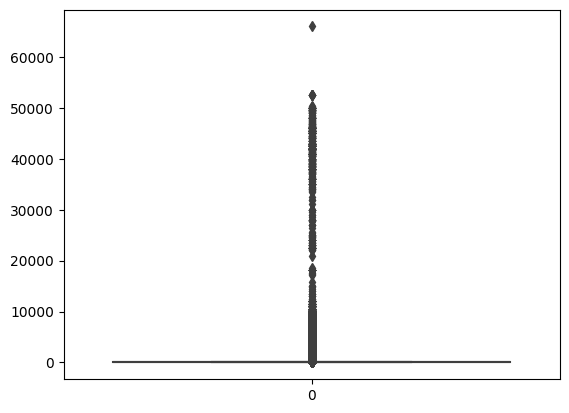

In [53]:
sns.boxplot(df1['modal_price'])

In [54]:
import matplotlib.pyplot as plt

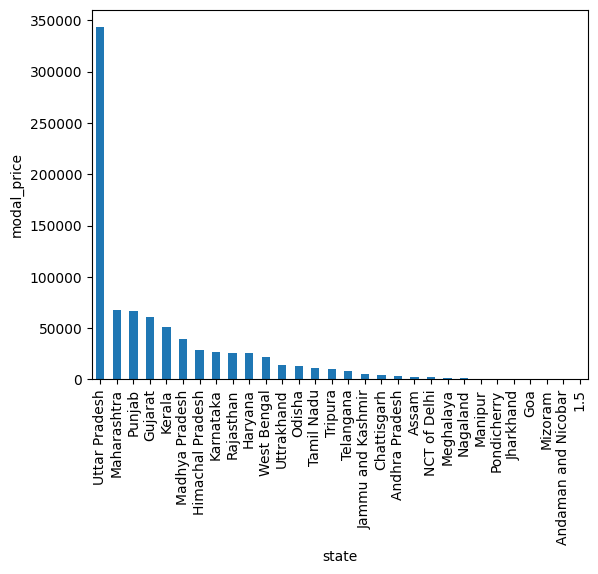

In [55]:
nd.state.value_counts().plot(kind='bar')
plt.xlabel('state')
plt.ylabel('modal_price')
plt.show()

In [56]:
len(nd['commodity_name'].unique())

250

#### insight: there are 250 commodities  present in the dataset

In [57]:
len(nd['state'].unique())

30

#### insight: there are 30 states  present in the dataset

In [58]:
max(nd['modal_price'])

66000.0

In [61]:
nd.isna().sum()

commodity_name    0
state             0
modal_price       1
dtype: int64

In [63]:
nd.dropna(inplace=True)

C:\Users\91957\AppData\Local\Temp\ipykernel_2156\1029660640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd.dropna(inplace=True)


In [65]:
nd

,commodity_name,state,modal_price
0,Ajwan,Gujarat,79.55
1,Ajwan,Gujarat,80.05
2,Ajwan,Gujarat,122.50
3,Ajwan,Gujarat,107.00
4,Ajwan,Gujarat,99.75
...,...,...,...
836972,Arhar (Tur/Red Gram)(Whole),Gujarat,5300.00
836973,Arhar (Tur/Red Gram)(Whole),Gujarat,5000.00
836974,Arhar (Tur/Red Gram)(Whole),Gujarat,5650.00
836975,Arhar (Tur/Red Gram)(Whole),Gujarat,5250.00


In [73]:
from scipy.stats import spearmanr

In [75]:
cor, p_value = spearmanr(nd['state'], nd['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: -0.16754597824118383
P-value: 0.0


In [76]:
cor, p_value = spearmanr(nd['commodity_name'], nd['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: -0.1738085737289172
P-value: 0.0


In [66]:
# model training

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x=nd.iloc[:,:-1]
x

,commodity_name,state
0,Ajwan,Gujarat
1,Ajwan,Gujarat
2,Ajwan,Gujarat
3,Ajwan,Gujarat
4,Ajwan,Gujarat
...,...,...
836972,Arhar (Tur/Red Gram)(Whole),Gujarat
836973,Arhar (Tur/Red Gram)(Whole),Gujarat
836974,Arhar (Tur/Red Gram)(Whole),Gujarat
836975,Arhar (Tur/Red Gram)(Whole),Gujarat


In [70]:
y=nd.iloc[:,-1]
y

0            79.55
1            80.05
2           122.50
3           107.00
4            99.75
            ...   
836972     5300.00
836973     5000.00
836974     5650.00
836975     5250.00
836976    11000.00
Name: modal_price, Length: 836976, dtype: float64

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [72]:
x_train.shape,x_test.shape

((627732, 2), (209244, 2))

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
# One-hot encode the categorical independent variable
encoder = OneHotEncoder()
x_train_encoded = encoder.fit_transform(x_train[["commodity_name","state"]])

In [80]:
x_test_encoded = encoder.transform(x_test[["commodity_name","state"]])

In [81]:
# Train the model
from sklearn.linear_model import LinearRegression
model =  LinearRegression()
model.fit(x_train_encoded, y_train)

LinearRegression()

In [82]:
y_pred=model.predict(x_test_encoded)

In [86]:
# Evaluate the model
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("Score:", score)

Score: 0.46325564521397855


In [92]:
product_name=input("enter your product name :")
state_name=input("enter your state name :")

encoded_ip=encoder.transform([[product_name,state_name]]).toarray()
# Maharashtra
# Soyabean

enter your product name :Arhar (Tur/Red Gram)(Whole)
enter your state name :Maharashtra


C:\Users\91957\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [93]:
prediction=model.predict(encoded_ip)


In [94]:
print("Price of your product is {}".format(prediction))

Price of your product is [5808.15063039]


In [95]:
import pickle
pickle.dump(encoder,open('encoder.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))